1. Explain probability in one sentence for a layman.
- **Ans:** Probability is the statistical theory of chances of occurance of any event.

2. Explain p-value in your own terms.
- **Ans:** p-value is the probability value of test statistics[z-test,t-test,chi-square-test,F-test]. p-value helps to take decision about the null hypothesis. if p-value is less then significance level[alpha{0.05,0.01,0.1,etc.}] then we reject the null hypothesis, if it is greater than significance level then we failed to reject the null hypothesis.

### Multivariate Statistical Analysis
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.\n\nSpecifically:\
- X1 Relative Compactness-Measure of compactnesss of the closure or building.  
    - More compact the build less will be the empty area inside which needs to heated or cooled.
      
- X2 Surface Area- Surface area of the building.
     
      - 
- X3 Wall Area- area of building covered by width of the wall
- X4 Roof Area - Area cover under roofs.

    - Roof area is the actual area where cooling or heating would be required i.e inside the building.
      
- X5 Overall Height- overall height of the building.
- X6 Orientation- orientation of building based on direction like(North facing,South facing and others)
- X7 Glazing Area- means the total area of the wall which is glass.
- X8 Glazing Area Distribution - How glazing area is distributed within the whole building.
- y1 Heating Load- How much heating load is required to heat the building.
- y2 Cooling Load- how much load is required to cold the building.

**Relative compactness(X1),Surface Area(X2),Glazing Area(X7),Orientation(X6) these are the factors who can affect energy efficiency.**

-------------------------------------------------------------------------------------------------------------------------------

   - We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. 
   
   
**Abstract:** This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

In [1]:
##import necessary libraries
import numpy as np
import pandas as pd

In [2]:
pd.read_excel(r'C:\Users\hp\Downloads\ENB2012_data.xlsx',sheet_name='datadetail')   ##data info

,1,2,3,4,5,6
0,Data Set Characteristics:,Multivariate,Number of Instances:,768.0,Area:,Computer
1,Attribute Characteristics:,"Integer, Real",Number of Attributes:,8.0,Date Donated,2012-11-30 00:00:00
2,Associated Tasks:,"Classification, Regression",Missing Values?,NaN,Number of Web Hits:,344289


In [3]:
data=pd.read_excel(r'C:\Users\hp\Downloads\ENB2012_data.xlsx')    ## read actual data

In [4]:
data.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [5]:
data.shape     ## dimension of the data

(768, 10)

In [6]:
data.isnull().sum()      ##checking Null values

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## EDA

In [8]:
data.describe()     ## statistics of the data or data description

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


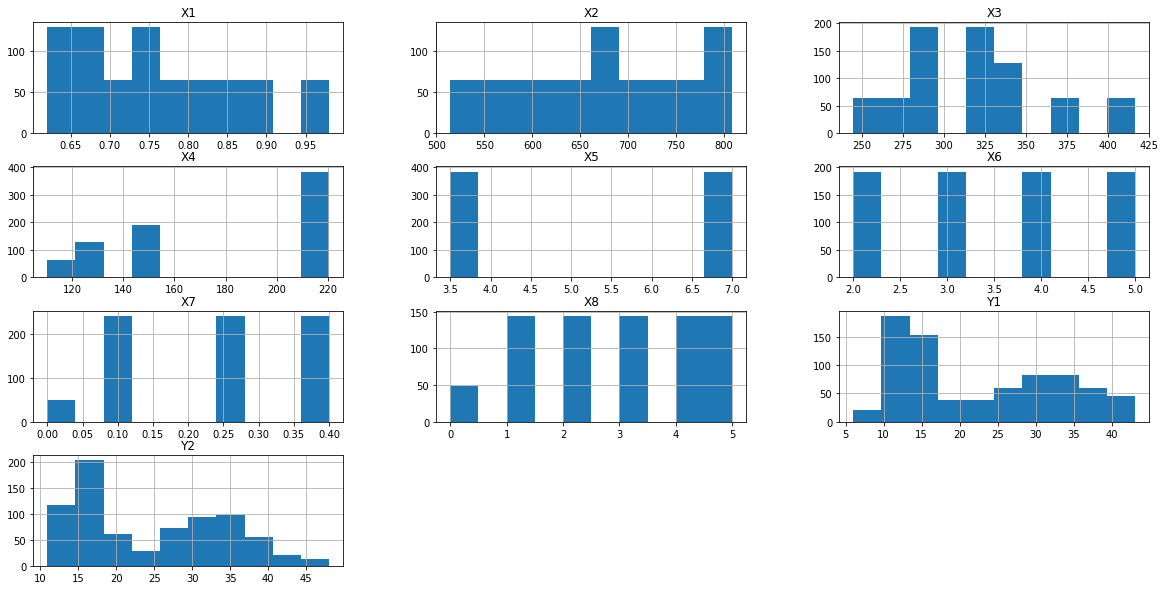

In [9]:
import matplotlib.pyplot as plt    ##Visualization library
data.hist(figsize=(20,10),)        ## Histogram plot for checking the distribution of each variables
plt.show()

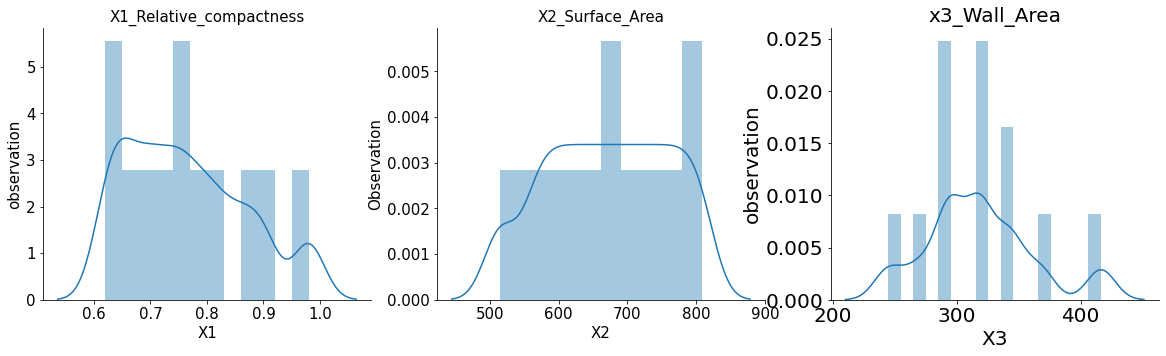

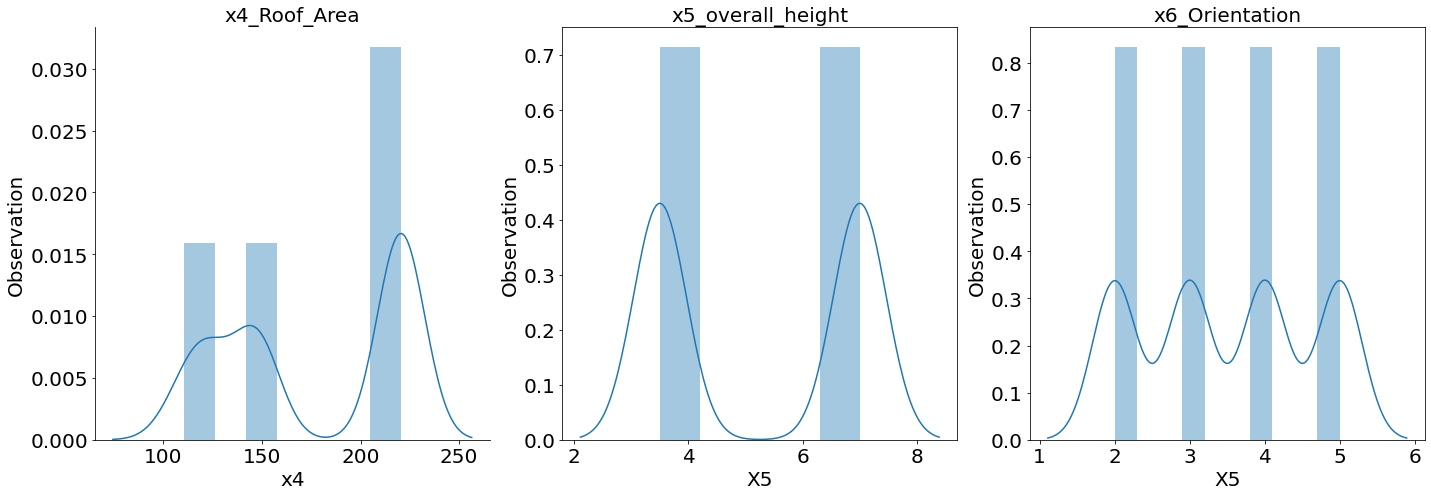

In [10]:
#b) Density Plot
import seaborn as sns   ## visualization library      
import warnings
warnings.filterwarnings("ignore")

##Independent variables
fig, (ax1, ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
sns.distplot(data['X1'], ax = ax1)      ## Distribution/density plot for X1(observation 1 of EEG Signals)
sns.despine(ax=ax1)
ax1.set_xlabel('X1', fontsize=15)
ax1.set_ylabel('observation', fontsize=15)
ax1.set_title('X1_Relative_compactness', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['X2'], ax = ax2)     ## Distribution/density plot for X2(observation 2 of EEG Signals)
sns.despine(ax = ax2)
ax2.set_xlabel('X2', fontsize=15)
ax2.set_ylabel('Observation', fontsize=15)
ax2.set_title('X2_Surface_Area', fontsize=15)
ax2.tick_params(labelsize=15)

sns.distplot(data['X3'], ax = ax3)     ## Distribution/density plot for X3(observation 3 of EEG Signals)
sns.despine(ax=ax3)
ax3.set_xlabel('X3', fontsize=20)
ax3.set_ylabel('observation', fontsize=20)
ax3.set_title('x3_Wall_Area', fontsize=20)
ax3.tick_params(labelsize=20)

fig, (ax4, ax5,ax6) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

sns.distplot(data['X4'], ax = ax4)    ## Distribution/density plot for X4(observation 4 of EEG Signals)
sns.despine(ax = ax4)
ax4.set_xlabel('x4', fontsize=20)
ax4.set_ylabel('Observation', fontsize=20)
ax4.set_title('x4_Roof_Area', fontsize=20)
ax4.tick_params(labelsize=20)

sns.distplot(data['X5'], ax = ax5)    ## Distribution/density plot for X4(observation 4 of EEG Signals)
sns.despine(ax = ax4)
ax5.set_xlabel('X5', fontsize=20)
ax5.set_ylabel('Observation', fontsize=20)
ax5.set_title('x5_overall_height', fontsize=20)
ax5.tick_params(labelsize=20)

sns.distplot(data['X6'], ax = ax6)    ## Distribution plot for X4(observation 4 of EEG Signals)
sns.despine(ax = ax4)
ax6.set_xlabel('X5', fontsize=20)
ax6.set_ylabel('Observation', fontsize=20)
ax6.set_title('x6_Orientation', fontsize=20)
ax6.tick_params(labelsize=20)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 

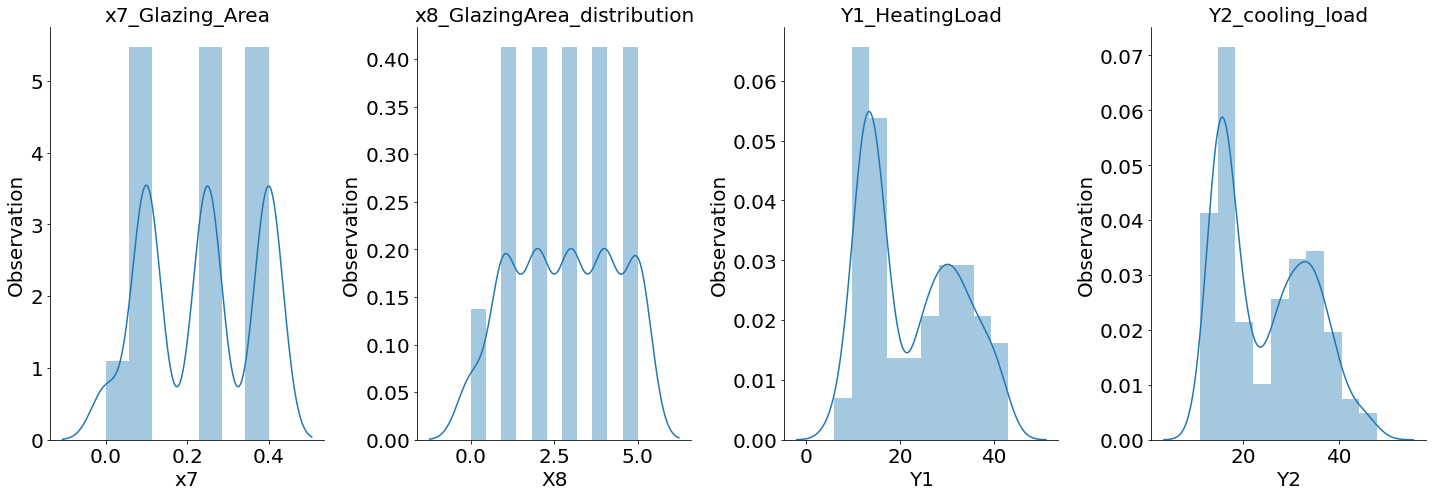

In [11]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 7))

sns.distplot(data['X7'], ax = ax1)    ## Distribution/density plot for X7
sns.despine(ax = ax1)
ax1.set_xlabel('x7', fontsize=20)
ax1.set_ylabel('Observation', fontsize=20)
ax1.set_title('x7_Glazing_Area', fontsize=20)
ax1.tick_params(labelsize=20)

sns.distplot(data['X8'], ax = ax2)    ## Distribution/density plot for X8
sns.despine(ax = ax2)
ax2.set_xlabel('X8', fontsize=20)
ax2.set_ylabel('Observation', fontsize=20)
ax2.set_title('x8_GlazingArea_distribution', fontsize=20)
ax2.tick_params(labelsize=20)

## dependent variables
sns.distplot(data['Y1'], ax = ax3)    ## Distribution/density plot for Y1
sns.despine(ax = ax3)
ax3.set_xlabel('Y1', fontsize=20)
ax3.set_ylabel('Observation', fontsize=20)
ax3.set_title('Y1_HeatingLoad', fontsize=20)
ax3.tick_params(labelsize=20)

sns.distplot(data['Y2'], ax = ax4)    ## Distribution/Density plot for Y2
sns.despine(ax = ax4)
ax4.set_xlabel('Y2', fontsize=20)
ax4.set_ylabel('Observation', fontsize=20)
ax4.set_title('Y2_cooling_load', fontsize=20)
ax4.tick_params(labelsize=20)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 

- Either variables are normally distributed or not.it is not clear. but somehow it seems it is normal for more clearity we will perform **Shapiro wilk's test**.

In [12]:
#C) Correlation
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


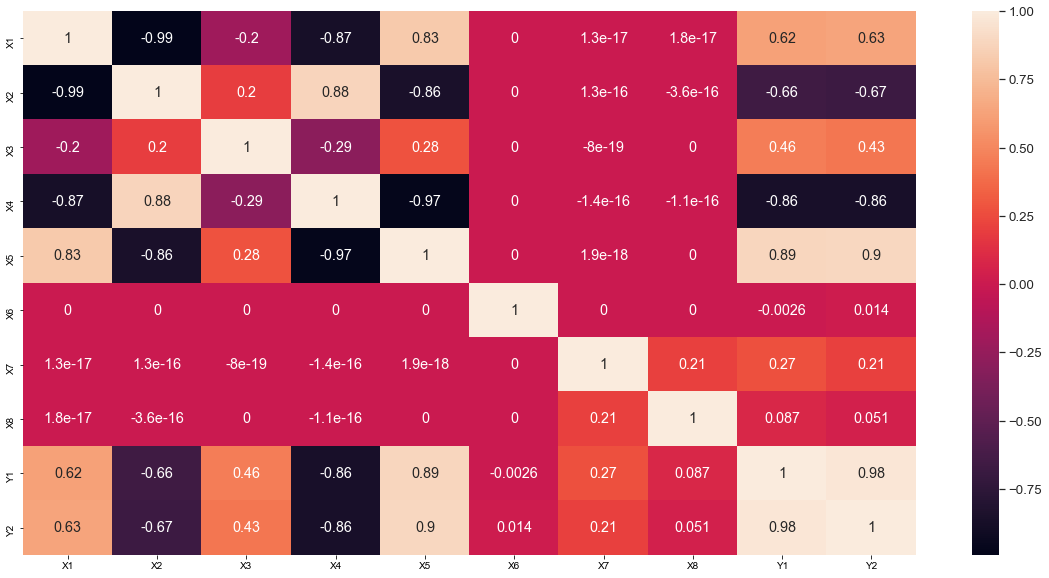

In [13]:
##Correlation plot
plt.subplots(figsize=(20,10))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(), annot=True)
plt.show()

- Correlation plot shows that there are strong relationship between independent variables and also in between dependent variable. 
- To remove this multicollinearity we will be using **dimension reduction techniques** to solve multicollinearity problem in the data.

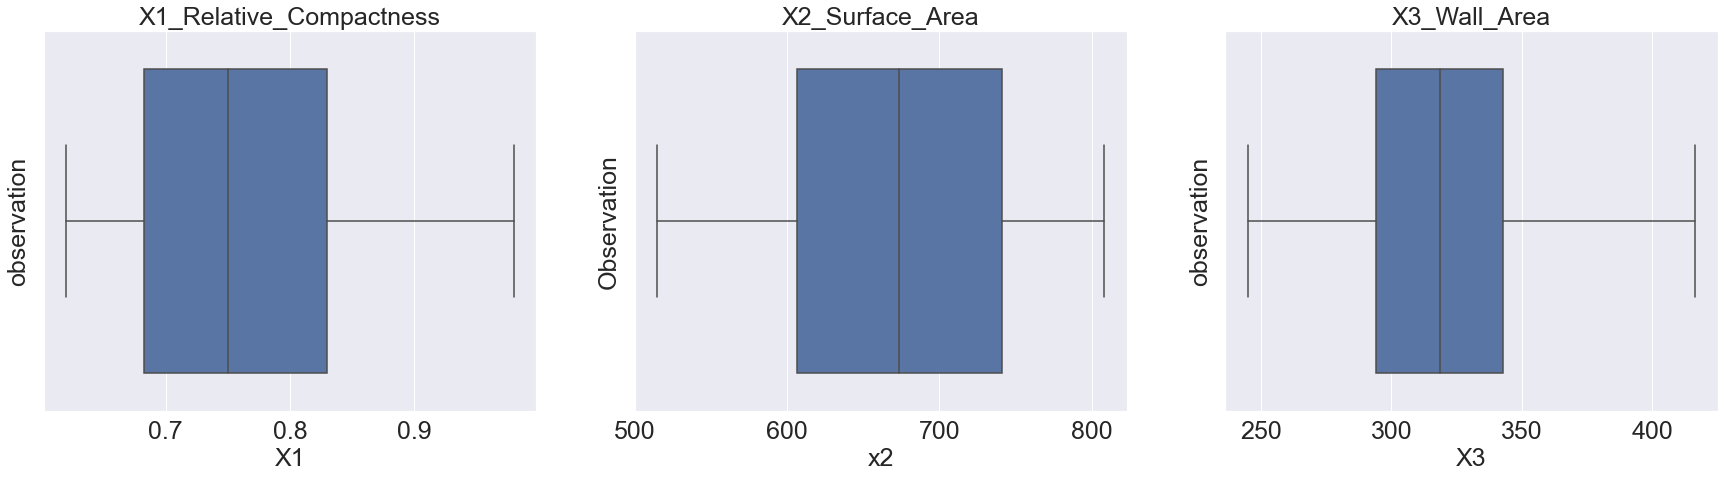

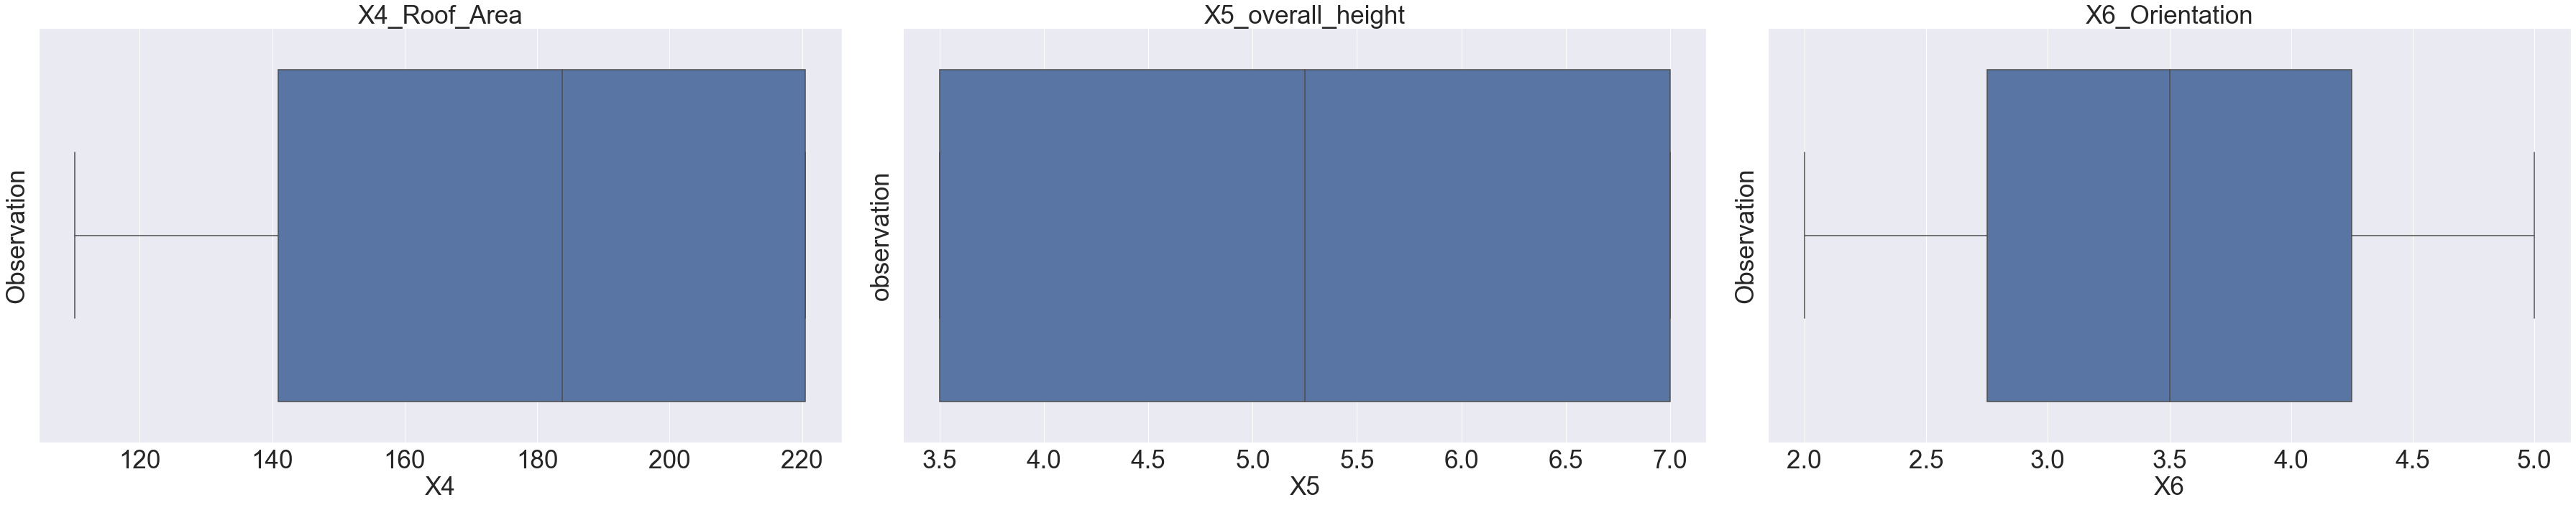

In [14]:
##Independent variables
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 7))
sns.boxplot(data['X1'], ax = ax1)      ## Boxplot for X1
ax1.set_xlabel('X1', fontsize=25)
ax1.set_ylabel('observation', fontsize=25)
ax1.set_title('X1_Relative_Compactness', fontsize=25)
ax1.tick_params(labelsize=25)

sns.boxplot(data['X2'], ax = ax2)     ## Boxplot for X2
ax2.set_xlabel('x2', fontsize=25)
ax2.set_ylabel('Observation', fontsize=25)
ax2.set_title('X2_Surface_Area', fontsize=25)
ax2.tick_params(labelsize=25)

sns.boxplot(data['X3'], ax = ax3)     ## Boxplot for X3
ax3.set_xlabel('X3', fontsize=25)
ax3.set_ylabel('observation', fontsize=25)
ax3.set_title('X3_Wall_Area', fontsize=25)
ax3.tick_params(labelsize=25)



fig, ( ax4, ax5, ax6) = plt.subplots(nrows = 1, ncols = 3, figsize = (50, 10))

sns.boxplot(data['X4'], ax = ax4)    ## Boxplot for X4
ax4.set_xlabel('X4', fontsize=35)
ax4.set_ylabel('Observation', fontsize=35)
ax4.set_title('X4_Roof_Area', fontsize=35)
ax4.tick_params(labelsize=35)

sns.boxplot(data['X5'], ax = ax5)      ## Boxplot for X5
ax5.set_xlabel('X5', fontsize=35)
ax5.set_ylabel('observation', fontsize=35)
ax5.set_title('X5_overall_height', fontsize=35)
ax5.tick_params(labelsize=35)

sns.boxplot(data['X6'], ax = ax6)     ## Boxplot for X5
ax6.set_xlabel('X6', fontsize=35)
ax6.set_ylabel('Observation', fontsize=35)
ax6.set_title('X6_Orientation', fontsize=35)
ax6.tick_params(labelsize=35)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

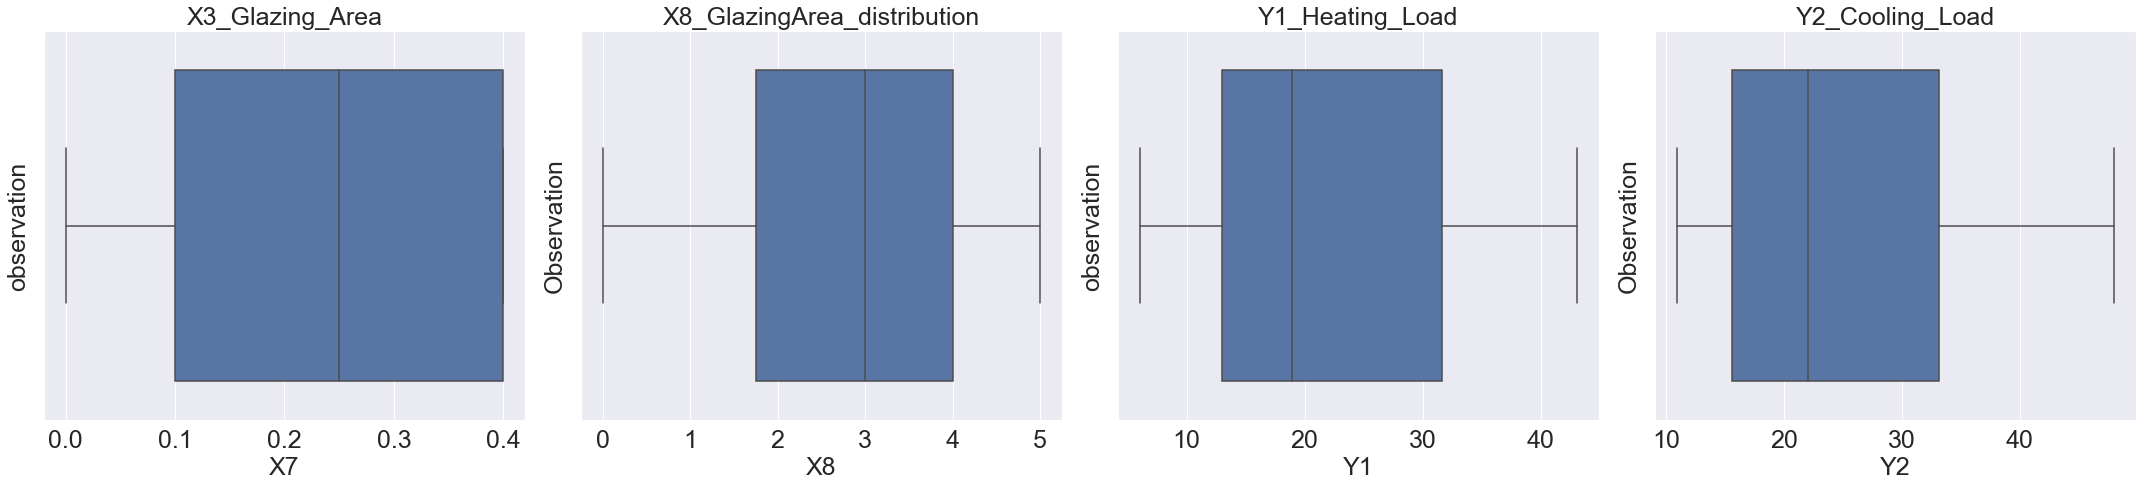

In [15]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 7))
sns.boxplot(data['X7'], ax = ax1)     ## Boxplot for X7
ax1.set_xlabel('X7', fontsize=25)
ax1.set_ylabel('observation', fontsize=25)
ax1.set_title('X3_Glazing_Area', fontsize=25)
ax1.tick_params(labelsize=25)

sns.boxplot(data['X8'], ax = ax2)    ## Boxplot for X8
ax2.set_xlabel('X8', fontsize=25)
ax2.set_ylabel('Observation', fontsize=25)
ax2.set_title('X8_GlazingArea_distribution', fontsize=25)
ax2.tick_params(labelsize=25)

## dependent variable
sns.boxplot(data['Y1'], ax = ax3)     ## Boxplot for Y1
ax3.set_xlabel('Y1', fontsize=25)
ax3.set_ylabel('observation', fontsize=25)
ax3.set_title('Y1_Heating_Load', fontsize=25)
ax3.tick_params(labelsize=25)

sns.boxplot(data['Y2'], ax = ax4)    ## Boxplot for Y2
ax4.set_xlabel('Y2', fontsize=25)
ax4.set_ylabel('Observation', fontsize=25)
ax4.set_title('Y2_Cooling_Load', fontsize=25)
ax4.tick_params(labelsize=25)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

- boxplot shows **no outliers** are present in any of variables

### Normality test
- **Shapiro wilk's test**

In [16]:
from scipy.stats import shapiro

print("Shapiro Normality Test")
print("\n")
print("Null Hypothesis : Sample data of the variable is from from Normal distribution")
print("Alternative Hypothesis : Sample data of the variable is not from from Normal distribution")
print("\n")

#perform Shapiro-Wilk test
statistic, p_value=shapiro(data)

print(data ," Shapiro statistic : %.6f, p value : %.6f" % (statistic, p_value))
alpha = 0.05
if p_value > alpha:
    print(data,"variable data" ,"is from Normal Distribution (fail to reject H0)")
else:
    print(data,"variable data","is not from Normal Distribution (reject H0)")   

Shapiro Normality Test


Null Hypothesis : Sample data of the variable is from from Normal distribution
Alternative Hypothesis : Sample data of the variable is not from from Normal distribution


       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]  Shapiro st

#### VIF [Variance Inflation Factor]

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = data.iloc[:, :-2]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature         VIF
0      X1  168.948751
1      X2         inf
2      X3         inf
3      X4         inf
4      X5  133.330460
5      X6   10.777604
6      X7    4.280992
7      X8    4.487153


- if VIF=1 ; Not correlated   
- If 1<VIF<5 ; Moderately correlated    
- if VIF>=5,10; Highly correlated   

so here our vif values are greater than 5, which shows high risk. Multicollinearity problem is there in bertween the independent variables.
- to solve this multicollinearity problem we will dimension reduction techniques **PCA**.

### PCA

data is not normal so we will normalize the data by using MinMaxscaler() function.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)
scaled_df = pd.DataFrame(data_rescaled)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:, :-2], scaled_df.iloc[:, 8:10], 
                            test_size=0.2, random_state=42) 

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components =7,random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [21]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.54185603e-01, 1.37670271e-01, 1.26127383e-01, 9.17824383e-02,
       8.12520458e-02, 8.51535512e-03, 4.66903244e-04])

In [22]:
print("components:", pca.components_)
print('\n')
print("mean:      ", pca.mean_)
print('\n')
print("covariance:", pca.get_covariance())

components: [[ 3.58750419e-01 -3.74086087e-01  5.40596824e-02 -5.40827869e-01
   6.60243800e-01 -2.35586116e-03  3.00296942e-03 -2.01493666e-03]
 [-6.86232142e-06 -6.46289991e-04 -1.03977975e-02  7.22545582e-03
   3.78905471e-03 -9.44187463e-01 -2.80532004e-01 -1.72153228e-01]
 [-2.42956806e-02  2.68238059e-02  6.34676119e-02 -1.35986236e-02
   1.50739925e-02  3.26946203e-01 -7.69730491e-01 -5.43020321e-01]
 [-3.68789103e-01  3.59961105e-01  8.12270753e-01 -1.51818002e-01
   2.13303617e-01 -3.29939688e-02  4.62512921e-02  5.35154271e-02]
 [ 1.00179605e-02 -8.02109923e-03 -1.14924376e-02 -1.75623639e-03
  -5.31057121e-03  2.03753710e-02 -5.71534067e-01  8.20125353e-01]
 [ 4.15733508e-01 -1.34042096e-01  3.47203674e-01 -4.48770096e-01
  -6.97937161e-01 -1.02983819e-02  3.67510056e-03 -4.18724174e-03]
 [-7.49511671e-01 -4.31495772e-01 -1.83420113e-01 -4.32667608e-01
  -1.76617175e-01 -9.22619366e-04 -1.96707811e-03 -1.05312487e-03]]


mean:       [0.39354868 0.54193811 0.43043276 0.610025

### Multivariate Linear Regression Analysis

In [23]:
#Multivariate Analysis
from sklearn.linear_model import LinearRegression  
  
classifier = LinearRegression()
fit=classifier.fit(X_train, y_train)    ### model for Y1+Y2-- Multivariate linear regression

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
print("Training set score:{:.3f}".format(fit.score(X_train,y_train)))
print("Test set score:{:.3f}".format(fit.score(X_test,y_test)))

Training set score:0.901
Test set score:0.903


In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.05897820469060451


In [27]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Of Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.00691494208379944
Root Of Mean Squared Error: 0.08315613076496188


- **Difference betwwen training score and testing score are very less or close which means that we avoided overfitting.This Means we have not over-fit the model.**
- **Here the difference between MAE and RMSE are less ,means that error size are less.our data and model are more representative with respect to mean** 

In [28]:
fit1=classifier.fit(X_train, y_train.iloc[:,0])    ### model for Y1['Heating load']--multiple linear regression

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
print("Training set score:{:.3f}".format(fit1.score(X_train,y_train.iloc[:,0])))
print("Test set score:{:.3f}".format(fit1.score(X_test,y_test.iloc[:,0])))

Training set score:0.917
Test set score:0.912


In [31]:
print('Mean Absolute Error for y1:', 
      metrics.mean_absolute_error(y_test.iloc[:,0], y_pred))
print('Mean Squared Error for y1:',metrics.mean_squared_error(y_test.iloc[:,0],y_pred))
print('Root Of Mean Squared Error for y1:',np.sqrt(metrics.mean_squared_error(y_test.iloc[:,0], y_pred)))

Mean Absolute Error for y1: 0.05883184136300612
Mean Squared Error for y1: 0.006653645342173506
Root Of Mean Squared Error for y1: 0.0815698801162139


In [32]:
fit2=classifier.fit(X_train, y_train.iloc[:,1])     ### model for Y2[cooling load]--Mutiple linear regression 

In [33]:
print("Training set score:{:.3f}".format(fit2.score(X_train,y_train.iloc[:,1])))
print("Test set score:{:.3f}".format(fit2.score(X_test,y_test.iloc[:,1])))

Training set score:0.886
Test set score:0.893


In [34]:
print('Mean Absolute Error for y1:', 
      metrics.mean_absolute_error(y_test.iloc[:,0], y_pred))
print('Mean Squared Error for y1:',metrics.mean_squared_error(y_test.iloc[:,0],y_pred))
print('Root Of Mean Squared Error for y1:',np.sqrt(metrics.mean_squared_error(y_test.iloc[:,0], y_pred)))

Mean Absolute Error for y1: 0.05883184136300612
Mean Squared Error for y1: 0.006653645342173506
Root Of Mean Squared Error for y1: 0.0815698801162139


### OLS Regression

In [35]:
import statsmodels.api as sm
X_trainO = sm.add_constant(X_train)

In [36]:
model1 = sm.OLS(y_train.iloc[:,0], X_trainO)   ### model for Y1[Heating load]
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      8   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     957.3
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          9.39e-323
Time:                        08:59:51   Log-Likelihood:                 695.09
No. Observations:                 614   AIC:                            -1374.
Df Residuals:                     606   BIC:                            -1339.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4353      0.003    137.375      0.0

In [37]:
model2 = sm.OLS(y_train.iloc[:,1], X_trainO)     ### model for Y2[cooling load]
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     672.3
Date:                Tue, 30 Mar 2021   Prob (F-statistic):          7.77e-281
Time:                        08:59:51   Log-Likelihood:                 634.21
No. Observations:                 614   AIC:                            -1252.
Df Residuals:                     606   BIC:                            -1217.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3639      0.003    103.996      0.0

- Included 1st 6 principal components to improve accuracy and also to remove the multicollinearity issues.

#### 1. overall model accuarcy is 90.1% for training and also for testing set 90.3% in multivariate linear regression model.
#### 2. for Y1-overall model accuarcy is 91.70% for training and for testing set 91.20% in multiple linear regression model.
#### 3. for Y2-overall model accuarcy is 88.60% for training and for testing set 89.30% in multiple linear regression model.

  - As in multivariate model accuracy for training and testing is almost same, so we will consider the **Mulivariate regression model.**

**Ridge Regression**

In [38]:
### model for Y1+Y2-- Multivariate regression
from sklearn import linear_model
reg  = linear_model.RidgeCV(
                    alphas = [10, 5, 2, 3, 1, 0.1, 0.3, 0.6, 0.9, 0.01, 0.05],
                    cv = 5)
reg.fit(X_train, y_train)

print("Best alpha: {}\n".format(reg.alpha_))
    
print("R2: %.3f" % reg.score(X_test, y_test))


Best alpha: 0.01

R2: 0.903


Got the same accuracy for model[Y1+Y2] in Multivariate linear regression and multivariate ridge regression for training set.

In [39]:
y_pred = reg.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE: %.3f\n" % (mean_squared_error(y_test, y_pred))) 
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test, y_pred))) 

MSE: 0.007

RMSE: 0.083



In [41]:
##model for Y1
reg  = linear_model.RidgeCV(
                    alphas = [10, 5, 2, 3, 1, 0.1, 0.3, 0.6, 0.9, 0.01, 0.05],
                    cv = 5)
reg.fit(X_train, y_train.iloc[:,0])

print("Best alpha: {}\n".format(reg.alpha_))
    
print("R2: %.3f" % reg.score(X_test, y_test.iloc[:,0]))

Best alpha: 0.01

R2: 0.912


In [42]:
y_pred = reg.predict(X_test)
print("MSE: %.3f\n" % (mean_squared_error(y_test.iloc[:,0], y_pred))) 
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test.iloc[:,0], y_pred))) 

MSE: 0.007

RMSE: 0.082



In [43]:
##model for Y2
reg  = linear_model.RidgeCV(
                    alphas = [10, 5, 2, 3, 1, 0.1, 0.3, 0.6, 0.9, 0.01, 0.05],
                    cv = 5)
reg.fit(X_train, y_train.iloc[:,1])

print("Best alpha: {}\n".format(reg.alpha_))
    
print("R2: %.3f" % reg.score(X_test, y_test.iloc[:,1]))

Best alpha: 0.01

R2: 0.893


In [44]:
y_pred = reg.predict(X_test)
print("MSE: %.3f\n" % (mean_squared_error(y_test.iloc[:,1], y_pred))) 
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test.iloc[:,1], y_pred))) 

MSE: 0.007

RMSE: 0.085



#### SVR-Support Vector Regression

In [45]:
from sklearn.svm import SVR
# for cooling load or model Y2
reg = SVR(C = 1000)
    # Train the model using the training sets
reg.fit(X_train, y_train.iloc[:,1])
    
    # Make predictions using the testing set
y_pred = reg.predict(X_test)
    
print("\nMSE: %.3f\n" % mean_squared_error(y_test.iloc[:,1], y_pred))
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test.iloc[:,1], y_pred)))  
error = (1/y_test.shape[0])*np.sum(np.absolute(y_test.iloc[:,1] - y_pred), axis = 0)
print("MAE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test.iloc[:,1] - y_pred)/y_test.iloc[:,1], axis = 0)
print("MAPE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test.iloc[:,1] - y_pred)/((y_test.iloc[:,1]+y_pred)/2), axis = 0)
print("SMAPE: %.3f\n" % error)  
print("R2: %.3f\n" % r2_score(y_test.iloc[:,1],y_pred))


MSE: 0.005

RMSE: 0.071

MAE: 0.062

MAPE: 31.320

SMAPE: 28.290

R2: 0.925



In [48]:
# For heating load or model Y1
reg = SVR(C = 1000)
    # Train the model using the training sets
reg.fit(X_train, y_train.iloc[:,0])
    
    # Make predictions using the testing set
y_pred = reg.predict(X_test)
    
print("\nMSE: %.3f\n" % mean_squared_error(y_test.iloc[:,0], y_pred))
print("RMSE: %.3f\n" % np.sqrt(mean_squared_error(y_test.iloc[:,0], y_pred)))  
error = (1/y_test.shape[0])*np.sum(np.absolute(y_test.iloc[:,0] - y_pred), axis = 0)
print("MAE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test.iloc[:,0] - y_pred)/y_test.iloc[:,0], axis = 0)
print("MAPE: %.3f\n" % error)  
error = (100/y_test.shape[0])*np.sum(np.absolute(y_test.iloc[:,0] - y_pred)/((y_test.iloc[:,0]+y_pred)/2), axis = 0)
print("SMAPE: %.3f\n" % error)  
print("R2: %.3f\n" % r2_score(y_test.iloc[:,0],y_pred))


MSE: 0.005

RMSE: 0.071

MAE: 0.063

MAPE: 27.977

SMAPE: 18.990

R2: 0.934



SVR--Support Vector Regression model giving the good accuracy from ridge and multivariate linear regression.
- Accuracy for SVR model-1 Y1 is 93.40% and for SVR model-2 Y2 is 92.5%.
- Accuracy for Ridge model Y1+Y2 is 90.3%, for Ridge model Y1 is 91.2% and for Ridge model Y2 is 89.3%.
- Accuracy for Multivariate linear regression model Y1+Y2 is 90.1%, for Multivariate linear regression model Y1 is 91.7%, for Multivariate linear regression model Y2 is 88.6%.
        
        
- *As per the all models accuracy, models for Y1[Heating load] is the most efficient model and in that SVR[Support Vector Regression] model is best model among the all models.*